# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Chiquito Shaduq Aurick Fulvian
- **Email:** richikosaf@gmail.com
- **ID Dicoding:** richikosaf 

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap banyak sepeda yang disewa
- Bagaimana pengaruh cuaca terhadap banyak sepeda yang disewa 
- Bagaimana pengaruh hari libur terhadap banyak sepeda yang disewa

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\day.csv", delimiter=",")
hour_df = pd.read_csv("data\hour.csv", delimiter=",")

### Assessing Data

cek data day_df

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


cek data hour_df

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


cek missing value di day_df

In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek missing value di hour_df

In [6]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek data duplikat di day_df dan hour_df

In [7]:
print("Jumlah data duplikat di day_df ", day_df.duplicated().sum())
print("Jumlah data duplikat di hour_df ", hour_df.duplicated().sum())

Jumlah data duplikat di day_df  0
Jumlah data duplikat di hour_df  0


cek outlier di day_df dan hour_df

<Axes: >

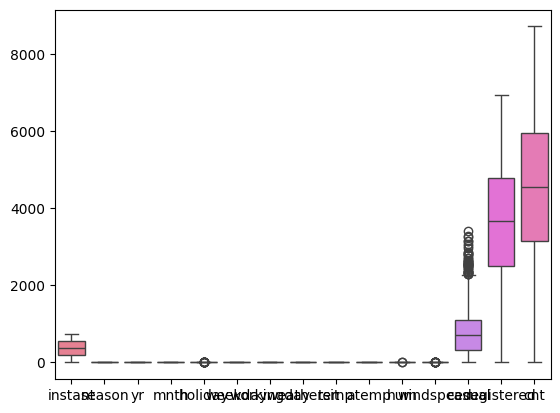

In [8]:
sns.boxplot(day_df)

cek fitur casual karena yang memiliki paling banyak outlier

<Axes: xlabel='casual'>

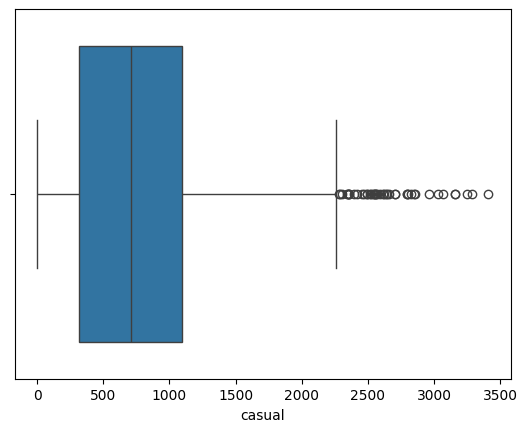

In [9]:
sns.boxplot(day_df, x = 'casual')

<Axes: >

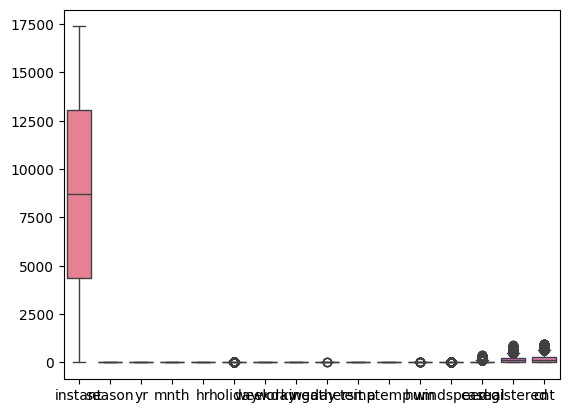

In [10]:
sns.boxplot(hour_df)

cek outlier di 'casual', 'registered' dan 'cnt' karena yang terlihat paling banyak outlier

<Axes: >

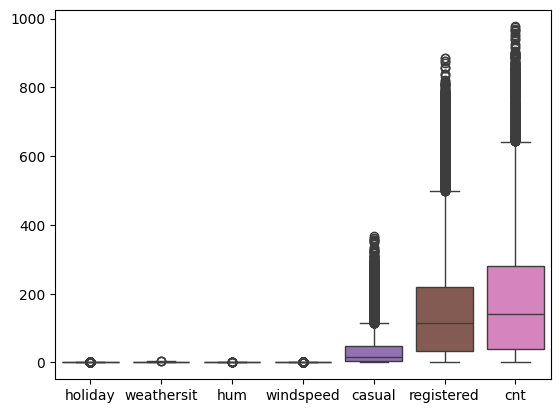

In [11]:
outlier_features = ['holiday','weathersit','hum','windspeed','casual', 'registered', 'cnt']
cek_outlier_df = hour_df[outlier_features]
sns.boxplot(cek_outlier_df)

<Axes: >

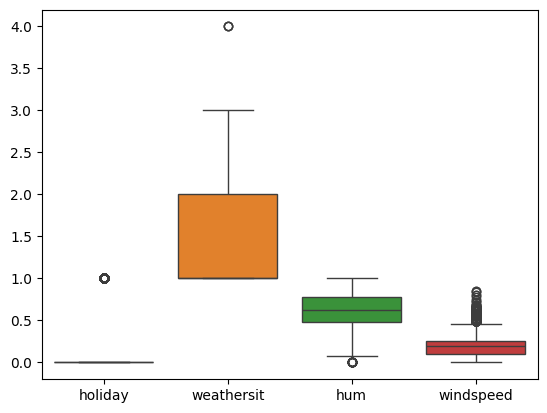

In [12]:
outlier_features = ['holiday','weathersit','hum','windspeed']
cek_outlier_df = hour_df[outlier_features]
sns.boxplot(cek_outlier_df)

### Cleaning Data

akan diterapkan imputation ke fitur 'hum' dan 'windspeed' yang datanya bersifat kontinu

In [13]:
for feature in ['hum', 'windspeed'] :
    Q1 = (hour_df[feature]).quantile(0.25)
    Q3 = (hour_df[feature]).quantile(0.75)
    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)
    
    kondisi_lower_than = hour_df[feature] < minimum
    kondisi_more_than = hour_df[feature] > maximum
    
    hour_df[feature] = hour_df[feature].apply(lambda x: minimum if x < minimum else x)
    hour_df[feature] = hour_df[feature].apply(lambda x: maximum if x > maximum else x)

<Axes: >

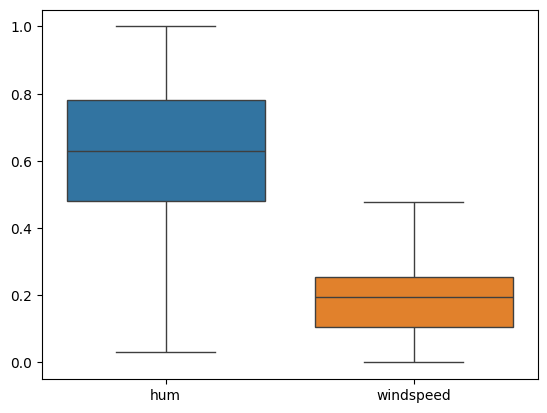

In [14]:
outlier_features = ['hum','windspeed']
cek_outlier_df = hour_df[outlier_features]
sns.boxplot(cek_outlier_df)

## Exploratory Data Analysis (EDA)

### Explore parameter

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627267,0.188691,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192809,0.118197,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

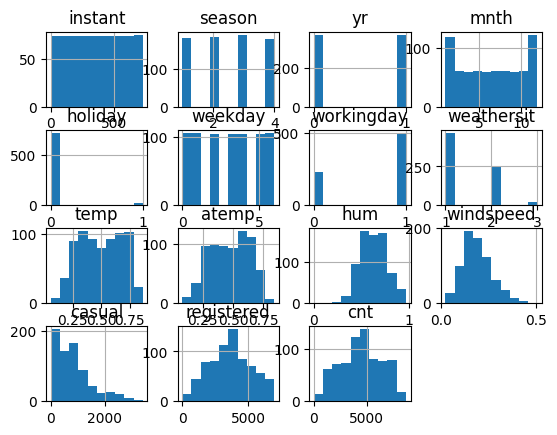

In [19]:
day_df.hist()

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

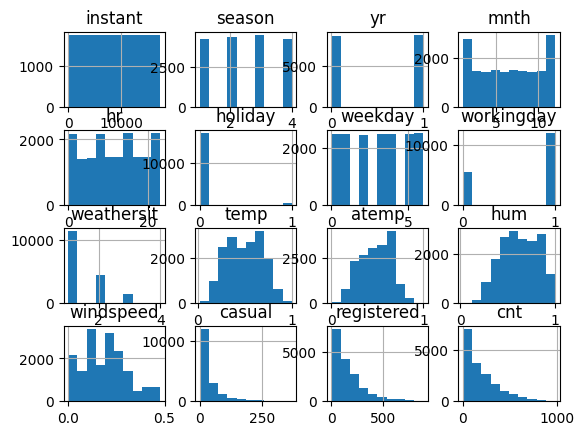

In [20]:
hour_df.hist()

cek apakah data day_df dengan hour_df berhubungan

In [21]:
sum_cnt_hour_df = hour_df['cnt'].sum()
sum_cnt_day_df = day_df['cnt'].sum()

print(sum_cnt_day_df == sum_cnt_hour_df)


True


In [22]:
first_day_hour = hour_df[hour_df['dteday'] == hour_df['dteday'][0]]
first_day_hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [23]:
day_df[day_df['dteday'] == hour_df['dteday'][0]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [24]:
first_day_hum = first_day_hour['hum']
first_day_hum.mean()

0.8058333333333333

In [25]:
first_day_temp = first_day_hour['temp']
first_day_temp.mean()

0.3441666666666667

In [26]:
first_day_casual = first_day_hour['casual']
first_day_casual.sum()

331

In [27]:
first_day_cnt = first_day_hour['cnt']
first_day_cnt.sum()

985

In [28]:
first_day_weathersit = first_day_hour['weathersit']
first_day_weathersit.mean()

1.5833333333333333

berdasarkan pengecekan yang sudah dilakukan dapat diartikan bahwa
1. hour_df merupakan data setiap jam per data hari di day_df
2. nilai continu pada day_df adalah mean dari hour_df pada hari yang sama
3. nilai diskrit pada day_df adalah sum dari hour_df pada hari yang sama
4. nilai weathersit pada day_df kemungkinan adalah mean dari hour_df pada hari yang sama dan di bulatkan ke atas

Karena terdapat relasi antara day_df dengan hour_df maka akan dilakukan merge

In [29]:
bike_sharing_df = hour_df.merge(right = day_df[['dteday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']],
                           how = 'inner', on = 'dteday', suffixes = ["", "_per_day"], validate = 'many_to_one')
bike_sharing_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_per_day,temp_per_day,atemp_per_day,hum_per_day,windspeed_per_day,casual_per_day,registered_per_day,cnt_per_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,13,16,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,32,40,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,27,32,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,10,13,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,108,119,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,81,89,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,83,90,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,48,61,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [30]:
label_musim = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
bike_sharing_df['season'] = bike_sharing_df['season'].replace(label_musim)
bike_sharing_df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [31]:
label_cuaca = {1: "clear", 2: "mist", 3: "mild", 4: "extreme"}
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].replace(label_cuaca) 
bike_sharing_df['weathersit'].unique()

array(['clear', 'mist', 'mild', 'extreme'], dtype=object)

cek banyak sepeda yang disewa pada tiap musim

In [32]:
bike_sharing_df.groupby('season').cnt.sum()

season
fall      1061129
spring     471348
summer     918589
winter     841613
Name: cnt, dtype: int64

cek banyak sepeda disewa pada tiap cuaca

In [33]:
bike_sharing_df.groupby('weathersit').cnt.sum()

weathersit
clear      2338173
extreme        223
mild        158331
mist        795952
Name: cnt, dtype: int64

cek berapa banyak jumlah sepeda yang disewa pada tiap musim yang terjadi pada tiap musim

In [34]:
bike_sharing_df.groupby(by=['season','weathersit']).agg({
    "instant" : "nunique",
    "cnt" : "sum"
})

instant     cnt
season weathersit                 
fall   clear          3280  801941
       mild            269   46256
       mist            947  212932
spring clear          2665  325278
       extreme           3     223
       mild            369   21642
       mist           1205  124205
summer clear          2859  664463
       mild            406   46763
       mist           1144  207363
winter clear          2609  546491
       mild            375   43670
       mist           1248  251452

cek banyak tiap cuaca yang terjadi tiap hari pada tiap musim

In [35]:
musim = bike_sharing_df['season'].unique()
cuaca = bike_sharing_df['weathersit'].unique()
cuaca_pada_musim = bike_sharing_df.groupby(['season', 'weathersit']).dteday.nunique().reset_index()
cuaca_pada_musim

,season,weathersit,dteday
0,fall,clear,183
1,fall,mild,72
2,fall,mist,140
3,spring,clear,174
4,spring,extreme,3
5,spring,mild,75
6,spring,mist,146
7,summer,clear,177
8,summer,mild,91
9,summer,mist,146


banyak sepeda yang disewa pada hari libur atau hari kerja

In [36]:
bike_sharing_df.groupby('holiday').agg({
    "instant" : "count",
    "cnt" : "sum"
})

,instant,cnt
holiday,,
0,16879,3214244
1,500,78435


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap banyak sepeda yang disewa


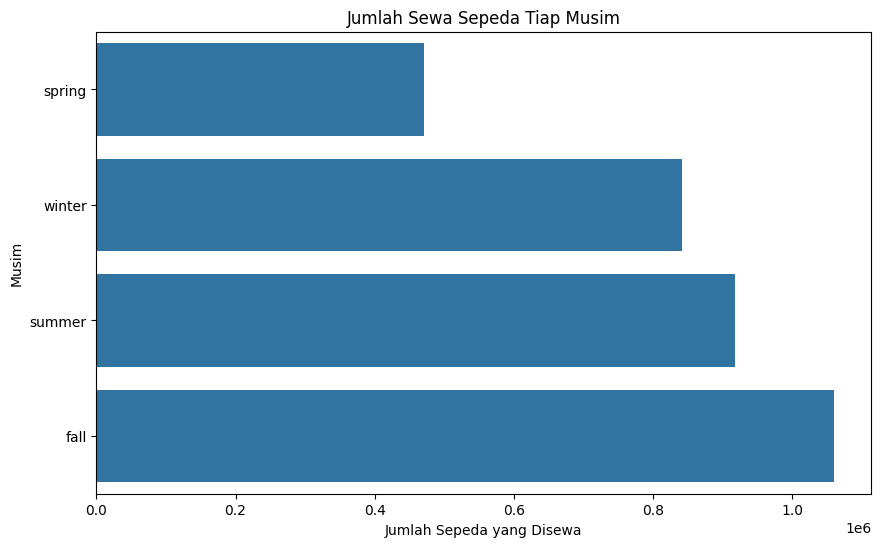

In [37]:
sewa_per_musim = bike_sharing_df.groupby('season').cnt.sum().reset_index().sort_values(by = 'cnt', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x = 'cnt', y = 'season', data = sewa_per_musim)

plt.title("Jumlah Sewa Sepeda Tiap Musim")
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.ylabel('Musim')

plt.show()

Jenis musim mempengaruhi banyak sepeda yang disewa dengan musim gugur memiliki jumlah sewa tertinggi dan musim semi memiliki jumlah sewa terendah

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap banyak sepeda yang disewa 

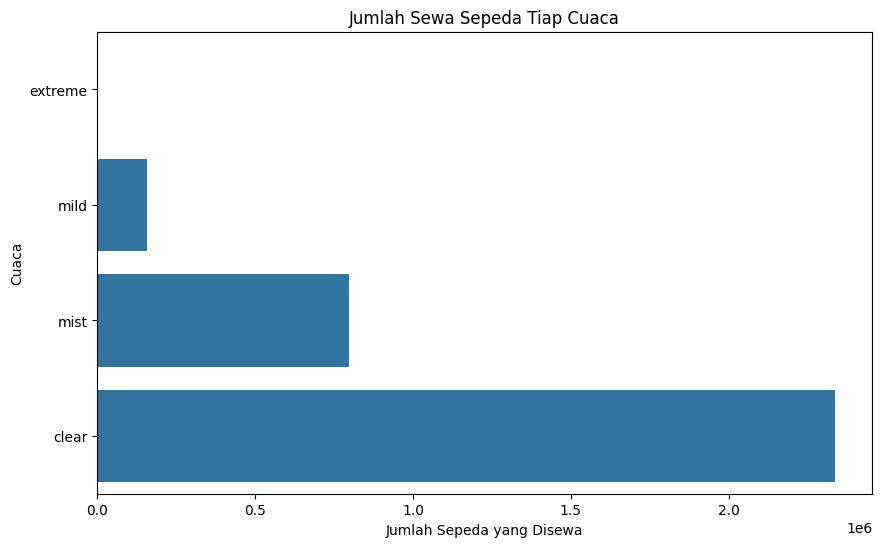

In [38]:
sewa_per_cuaca = bike_sharing_df.groupby('weathersit').cnt.sum().reset_index().sort_values(by = 'cnt', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x = 'cnt', y = 'weathersit', data = sewa_per_cuaca)

plt.title("Jumlah Sewa Sepeda Tiap Cuaca")
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.ylabel('Cuaca')

plt.show()

Cuaca berpengaruh terhadap banyak sepeda yang disewa dengan tipe cuaca 'clear' merupakan tipe cuaca dengan jumlah sewa tertinggi

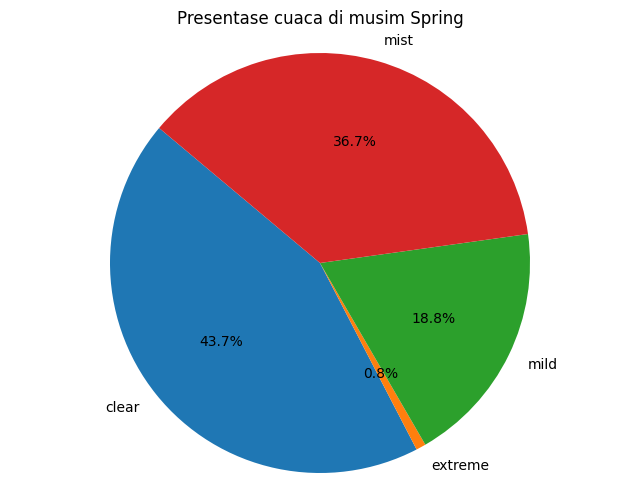

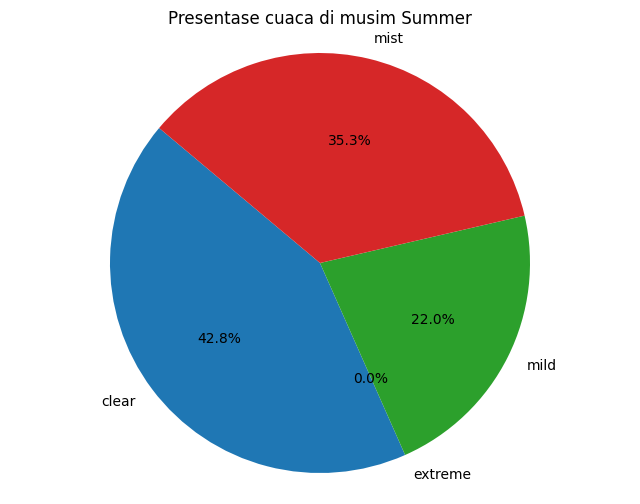

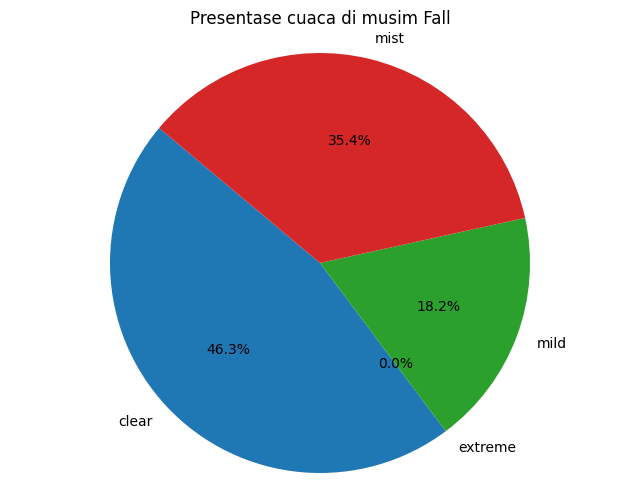

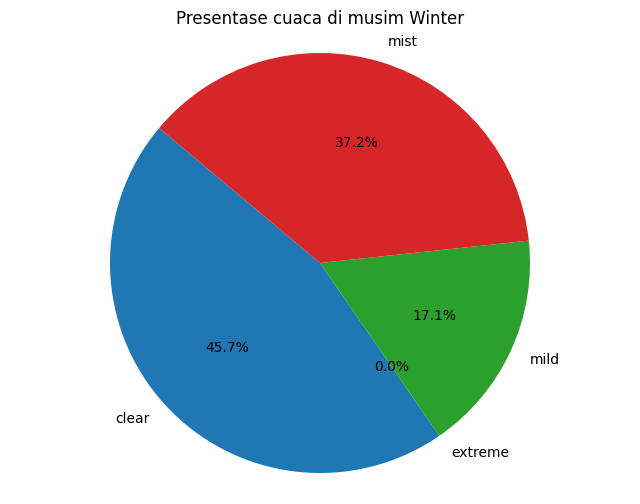

In [39]:
cuaca_pada_musim = bike_sharing_df.groupby(['season', 'weathersit']).dteday.nunique().unstack(fill_value=0)
musim = bike_sharing_df['season'].unique()

for season in musim:
    data_musim = cuaca_pada_musim.loc[season]
    
    total_count = data_musim.sum()
    percentages = data_musim / total_count * 100
    
    plt.figure(figsize=(8, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Presentase cuaca di musim {season.capitalize()}')
    plt.axis('equal')  
    plt.show()

Musim gugur memiliki cuaca terbaik karena memiliki presentase cuaca cerah (clear) tertinggi

### Pertanyaan 3: Bagaimana pengaruh hari libur terhadap banyak sepeda yang disewa

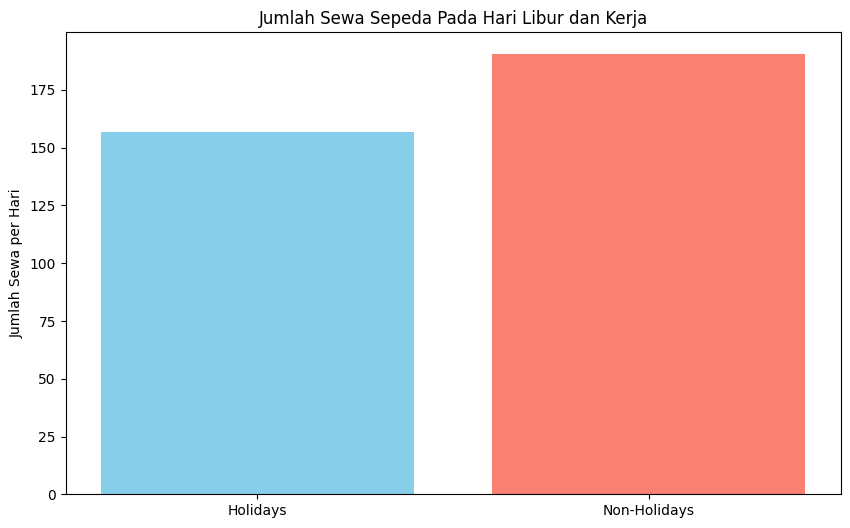

In [40]:
holiday_bike_sharing = bike_sharing_df.groupby('holiday').agg({
    "instant" : "count",
    "cnt" : "sum"
}).reset_index()

total_non_holiday = holiday_bike_sharing.loc[holiday_bike_sharing['holiday'] == 0, 'instant'].values[0]
total_sharing_non_holiday = holiday_bike_sharing.loc[holiday_bike_sharing['holiday'] == 0, 'cnt'].values[0]

total_holiday = holiday_bike_sharing.loc[holiday_bike_sharing['holiday'] == 1, 'instant'].values[0]
total_sharing_holiday = holiday_bike_sharing.loc[holiday_bike_sharing['holiday'] == 1, 'cnt'].values[0]
percentage_sharing_holiday = (total_sharing_holiday / total_holiday) 
percentage_sharing_non_holiday = (total_sharing_non_holiday / total_non_holiday)

percentage_sharing_holiday
plt.figure(figsize=(10,6))
plt.bar(['Hari Libur', 'Hari Kerja'], [percentage_sharing_holiday, percentage_sharing_non_holiday], color=['skyblue', 'salmon'])
plt.title('Jumlah Sewa Sepeda Pada Hari Libur dan Kerja')
plt.ylabel('Jumlah Sewa per Hari')
plt.show()


Hari libur atau hari kerja memengaruhi jumlah sewa sepeda. Berdasarkan jumlah sewa per hari, lebih banyak pengguna yang menyewa sepeda pada hari kerja.

## Conclusion

- Conclution pertanyaan 1 : Jenis musim memengaruhi jumlah penyewaan sepeda dengan jumlah sewa sepeda paling tinggi terjadi pada musim gugur (fall)

    Musim gugur memiliki pemandangan yang cocok untuk bersepeda. Musim gugur juga datang setelah musim panas yang memungkinkan pengguna memiliki keinginan untuk beraktivitas di luar rumah dengan bersepeda karena temperatur yang menurun dari musim panas. Budaya dan lingkungan setempat pada musim gugur juga dapat menjadi pengaruh meningkatnya jumlah sewa sepeda pada musim tersebut.
- Conclution pertanyaan 2 : Jenis cuaca memengaruhi jumlah penyewaan sepeda dengan jumlah sewa sepeda tertinggi terjadi pada cuaca cerah (clear)

    Cuaca cerah merupakan cuaca terbaik untuk melakukan kegiatan di luar ruangan karena tidak terdapat halangan yang disebabkan oleh cuaca. Semakin buruk kondisi cuaca pada hari itu, maka jumlah sewa sepeda menurun.
    Pengaruh cuaca juga dapat terus dibuktikan dengan musim gugur memiliki tingkat penyewaan sepeda tertinggi, karena pada musim gugur memiliki kondisi cuaca yang paling baik dibandingkan musim lainnya.

- Conclution pertanyaan 3 : Hari libur atau hari kerja memengaruhi jumlah sewa sepeda. Lebih banyak pengguna yang menyewa sepeda pada hari kerja.

    Pengguna menyewa pada hari kerja tidak hanya untuk aktivitas rekreasi di luar rumah, tetapi juga digunakan untuk transportasi pulang-pergi kerja atau sekolah.
    Pada hari libur kegiatan kerja atau sekolah akan menurun, maka dari itu jumlah sewa pun menurun. Kemungkinan sebagian pengguna memilih untuk beristirahat pada hari libur dan tidak melakukan tranportasi menggunakan sepeda.
    
